In [9]:
import os
import glob2

import math

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

import pymcr
from pymcr.mcr import McrAR
from pymcr.regressors import OLS, NNLS
from pymcr.constraints import ConstraintNonneg, ConstraintNorm

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [4]:
dir_name = r'C:\Users\ashoff\Desktop'
fname = r'GaAl2O3_rxn2_NormXANES.csv'

In [5]:
df = pd.read_csv(os.path.join(dir_name, fname), sep = ',', index_col=0)

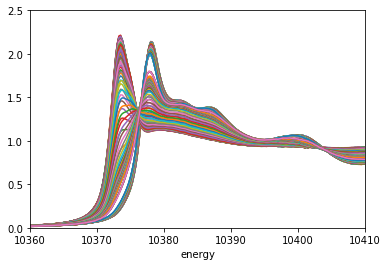

In [6]:
df.plot()
plt.xlim(10360,10410)
plt.ylim(0,2.5)
plt.legend().remove()

In [7]:
# Break dataframe into two arrays: energy (x axis) & spectra (data)

energy = df.index.values

spectra = df.to_numpy(copy = True)

In [8]:
num_spectra = np.shape(spectra)[1]
data_pts = np.shape(spectra)[0]

print(f'Number of Spectra: {num_spectra}')
print(f'Number of Data Points: {data_pts}')

Number of Spectra: 167
Number of Data Points: 321


In [10]:
num_components = 3

scaler = math.floor(num_spectra/num_components)

initial_spectra = np.zeros([data_pts, num_components])

for i in range(num_components):
    if i != num_components-1:
        initial_spectra[:,i] = spectra[:,i*scaler]
    else:
        initial_spectra[:,i] = spectra[:,-1]
        

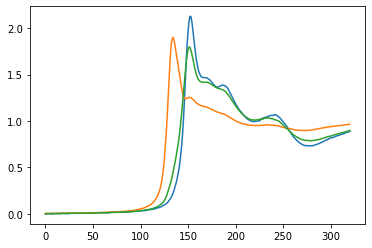

In [12]:
# Visualizse intial  guess spectra
plt.plot(initial_spectra)

In [30]:
D = spectra

intial_spectra = initial_spectra

In [31]:
print(f'Shape of D: {np.shape(D)}')
print(f'Shape of Guess: {np.shape(intial_spectra)}')

Shape of D: (321, 167)
Shape of Guess: (321, 3)


In [32]:
# Set up MCR regression and constraints:

mcrar = McrAR(max_iter=100, st_regr='NNLS', c_regr=OLS(), 
                c_constraints=[ConstraintNonneg(), ConstraintNorm()])

In [33]:
# Perform MCR

mcrar.fit(D, ST = initial_spectra)
print('\nFinal MSE: {:.7e}'.format(mcrar.err[-1]))

ValueError: Shape mismatch: a and b should have the same number of rows (3 != 167).